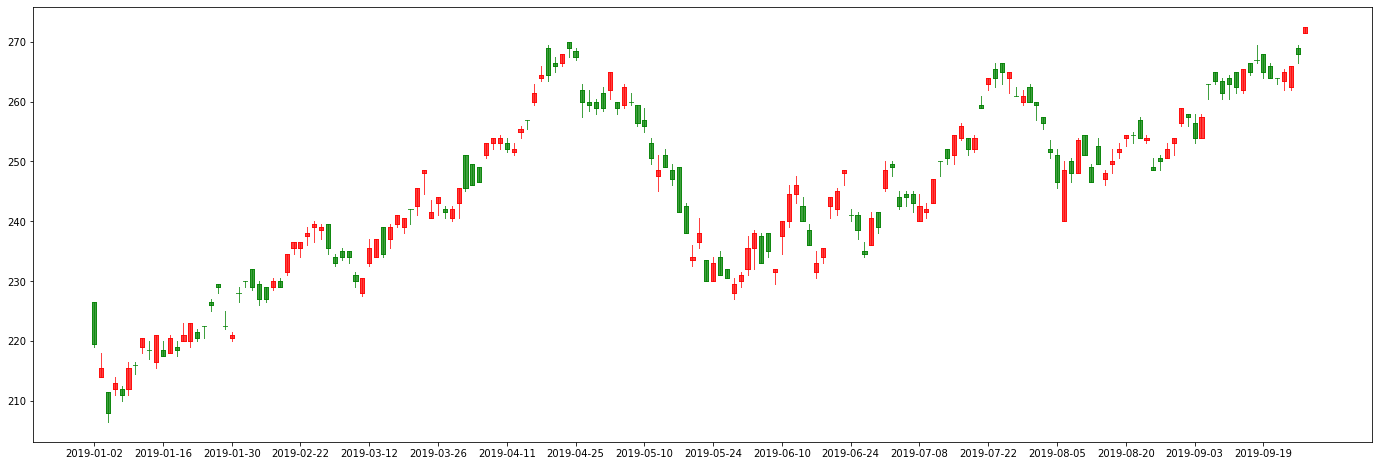

In [1]:
# basic
import numpy as np
import pandas as pd

# get data
import pandas_datareader as pdr

# visual
import matplotlib.pyplot as plt
import mpl_finance as mpf
%matplotlib inline
import seaborn as sns

#time
import datetime as datetime

#talib
import talib

start = datetime.datetime(2019,1,1)
df_2330 = pdr.DataReader('2330.TW', 'yahoo', start=start)

df_2330.index = df_2330.index.format(formatter=lambda x: x.strftime('%Y-%m-%d')) 

fig = plt.figure(figsize=(24, 8))

ax = fig.add_subplot(1, 1, 1) #facecolor='#223340'

ax.set_xticks(range(0, len(df_2330.index), 10))

ax.set_xticklabels(df_2330.index[::10])

mpf.candlestick2_ochl(ax, df_2330['Open'], df_2330['Close'], df_2330['High'],df_2330['Low'], width=0.6, colorup='r', colordown='g', alpha=0.75)


#save png
plt.savefig(R'C:\Users\Peter\Wits-Project\team_proj_picture\tsmc_wite.png')

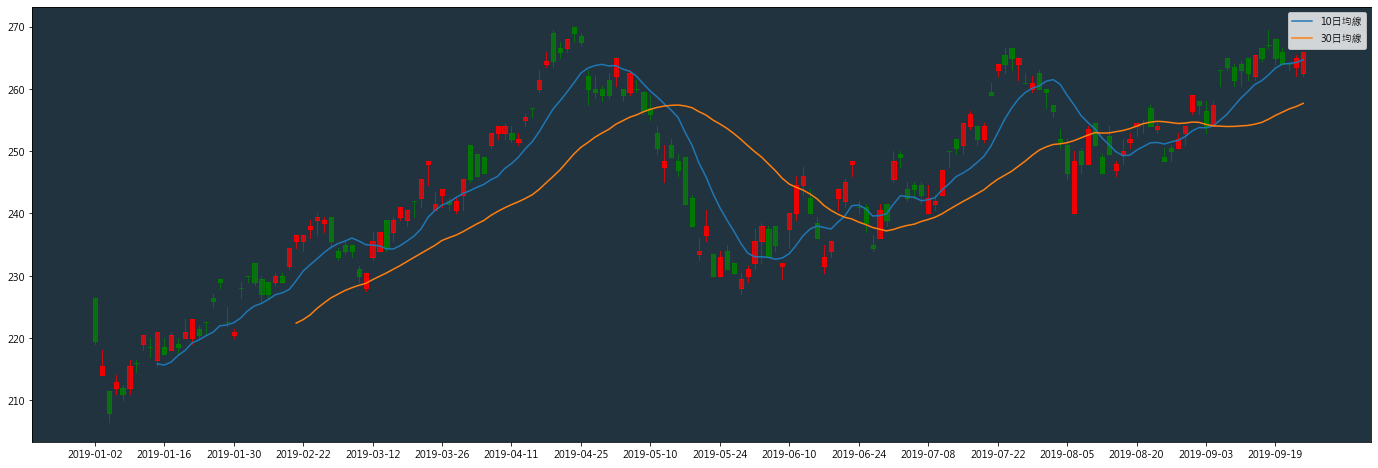

In [29]:
#日均線,dayline

sma_10 = talib.SMA(np.array(df_2330['Close']), 10)
sma_30 = talib.SMA(np.array(df_2330['Close']), 30)

fig = plt.figure(figsize=(24, 8))
ax = fig.add_subplot(1, 1, 1,facecolor='#223340')
ax.set_xticks(range(0, len(df_2330.index), 10))
ax.set_xticklabels(df_2330.index[::10])
mpf.candlestick2_ochl(ax, df_2330['Open'], df_2330['Close'], df_2330['High'],
                      df_2330['Low'], width=0.6, colorup='r', colordown='g', alpha=0.75)
plt.rcParams['font.sans-serif']=['Microsoft JhengHei'] 
ax.plot(sma_10, label='10日均線')
ax.plot(sma_30, label='30日均線')
ax.legend();

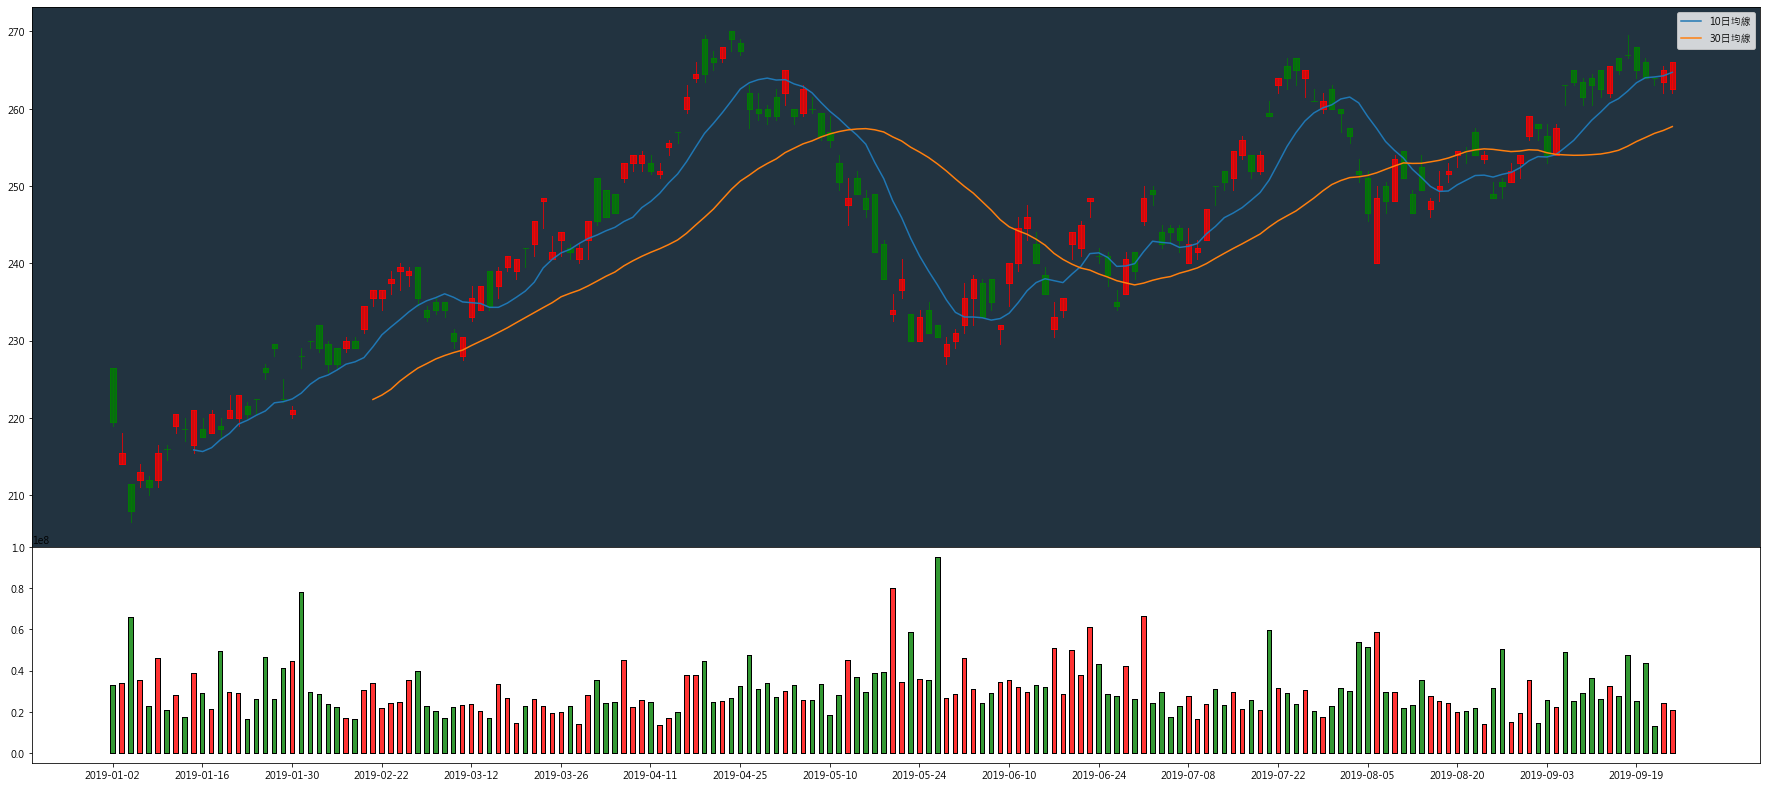

In [30]:
#成交量，Volume

sma_10 = talib.SMA(np.array(df_2330['Close']), 10)
sma_30 = talib.SMA(np.array(df_2330['Close']), 30)

fig = plt.figure(figsize=(24, 15))
ax = fig.add_axes([0,0.2,1,0.5],facecolor='#223340')
ax2 = fig.add_axes([0,0,1,0.2])

ax.set_xticks(range(0, len(df_2330.index), 10))
ax.set_xticklabels(df_2330.index[::10])
mpf.candlestick2_ochl(ax, df_2330['Open'], df_2330['Close'], df_2330['High'],
                      df_2330['Low'], width=0.6, colorup='r', colordown='g', alpha=0.75)
plt.rcParams['font.sans-serif']=['Microsoft JhengHei'] 
ax.plot(sma_10, label='10日均線')
ax.plot(sma_30, label='30日均線')

mpf.volume_overlay(ax2, df_2330['Open'], df_2330['Close'], df_2330['Volume'], colorup='r', colordown='g', width=0.5, alpha=0.8)
ax2.set_xticks(range(0, len(df_2330.index), 10))
ax2.set_xticklabels(df_2330.index[::10])

ax.legend();

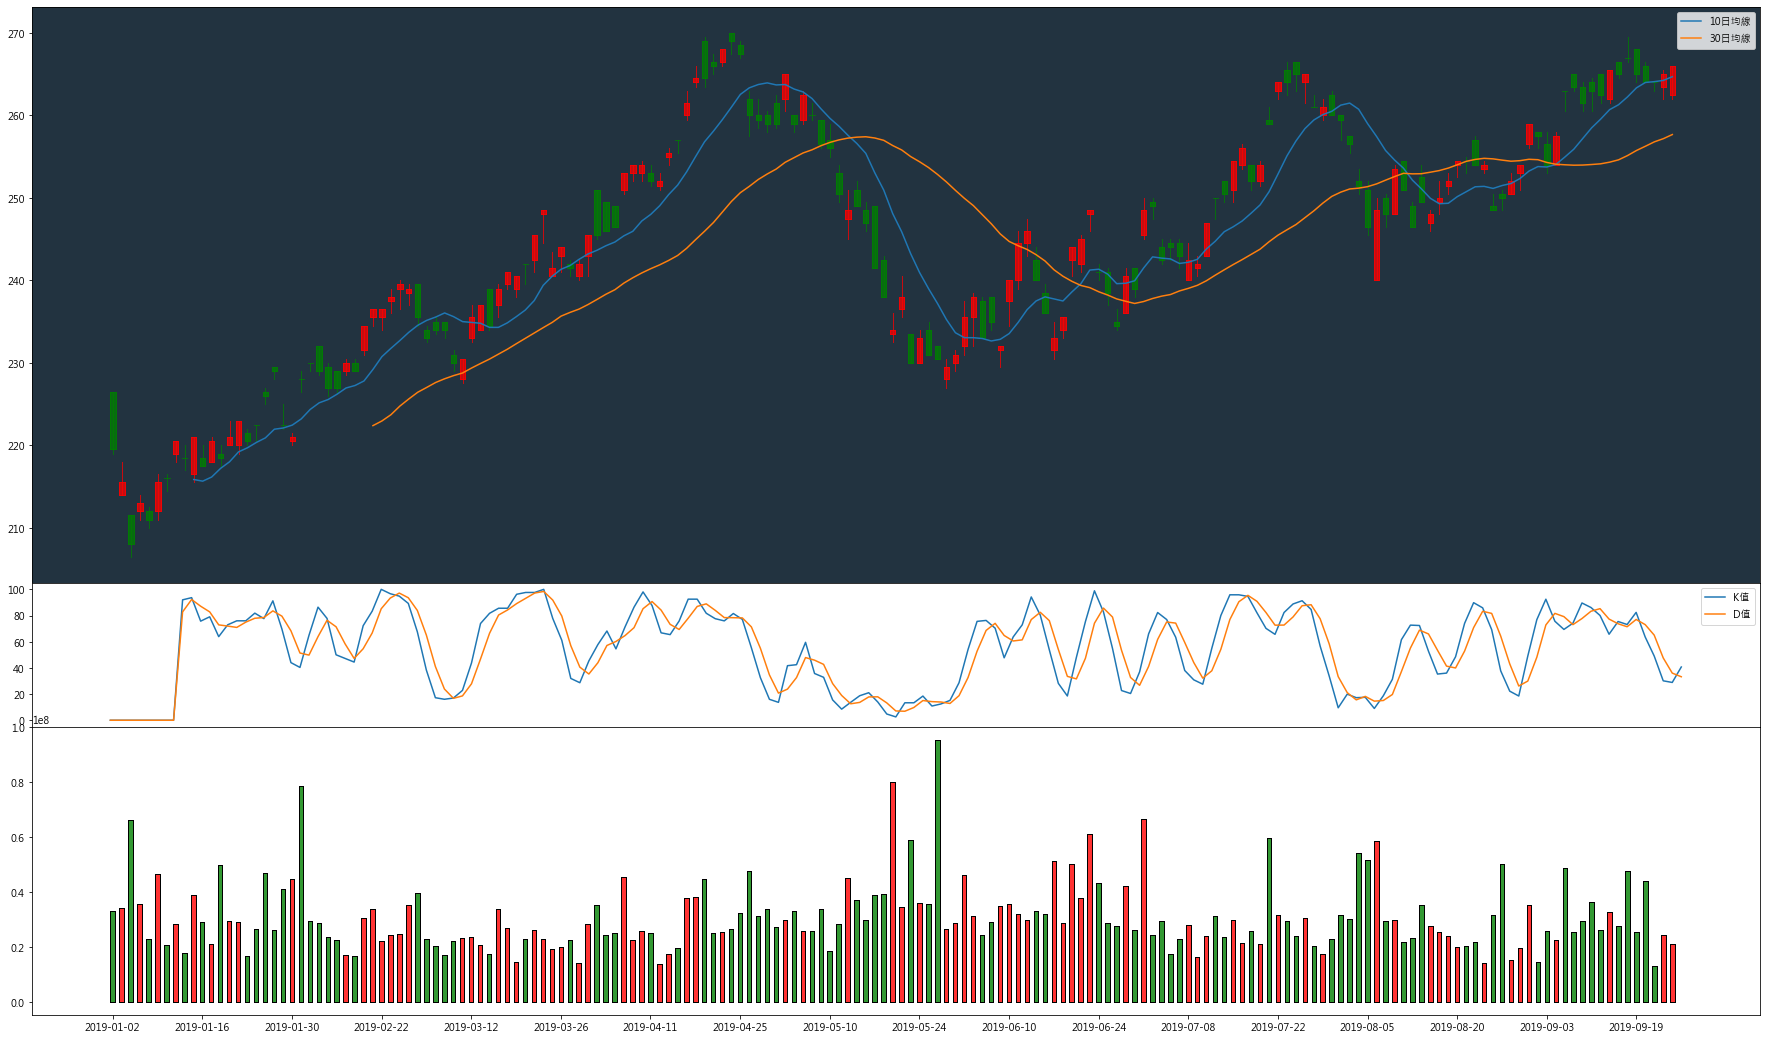

In [31]:
#KD 指標，KD.INDEX

sma_10 = talib.SMA(np.array(df_2330['Close']), 10)
sma_30 = talib.SMA(np.array(df_2330['Close']), 30)
df_2330['k'], df_2330['d'] = talib.STOCH(df_2330['High'], df_2330['Low'], df_2330['Close'])
df_2330['k'].fillna(value=0, inplace=True)
df_2330['d'].fillna(value=0, inplace=True)

fig = plt.figure(figsize=(24, 20))
ax = fig.add_axes([0,0.3,1,0.4],facecolor='#223340')
ax2 = fig.add_axes([0,0.2,1,0.1])
ax3 = fig.add_axes([0,0,1,0.2])

ax.set_xticks(range(0, len(df_2330.index), 10))
ax.set_xticklabels(df_2330.index[::10])
mpf.candlestick2_ochl(ax, df_2330['Open'], df_2330['Close'], df_2330['High'],
                      df_2330['Low'], width=0.6, colorup='r', colordown='g', alpha=0.75)
plt.rcParams['font.sans-serif']=['Microsoft JhengHei'] 
ax.plot(sma_10, label='10日均線')
ax.plot(sma_30, label='30日均線')

ax2.plot(df_2330['k'], label='K值')
ax2.plot(df_2330['d'], label='D值')
ax2.set_xticks(range(0, len(df_2330.index), 10))
ax2.set_xticklabels(df_2330.index[::10])

mpf.volume_overlay(ax3, df_2330['Open'], df_2330['Close'], df_2330['Volume'], colorup='r', colordown='g', width=0.5, alpha=0.8)
ax3.set_xticks(range(0, len(df_2330.index), 10))
ax3.set_xticklabels(df_2330.index[::10])

ax.legend();
ax2.legend();